In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import healpy as hp
from scipy.spatial import ConvexHull
import meshio

# 1) Plotting the mesh
To have an idea of how it looks like

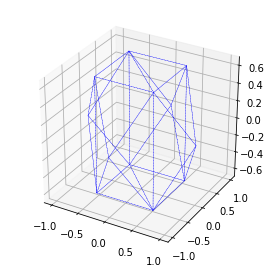

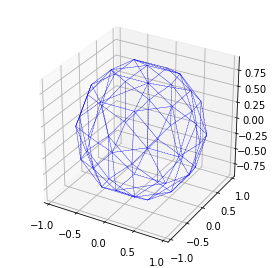

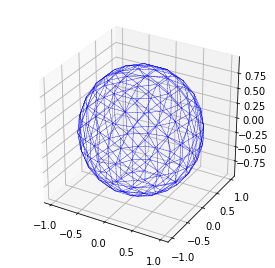

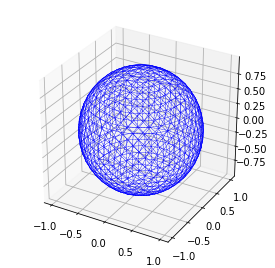

In [2]:
def plot_mesh(nside):

    # preparing the matrix [npix, 3] where each ith row is the vector of the coordinates in R^3 of the ith point
    npix = nside**2*12  # HEALPix sampling works like this
    indexes = range(nside**2 * 12)
    x, y, z = hp.pix2vec(nside, indexes)
    coords = np.vstack([x, y, z]).transpose()
    coords = np.asarray(coords)

    # creating the triangolation (mesh) that forms the convex hull of the vertices
    tri = ConvexHull(coords)
    tri.simplices.shape

    # plotting the mesh
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(221, projection='3d')
    for simplex in tri.simplices:
        s = simplex.copy()
        s = np.append(s, simplex[0])
        ax.plot(coords[s][:,0], coords[s][:,1], coords[s][:,2], 'b--', LineWidth=0.3)


for nside in [1, 2, 4, 8]:
    plot_mesh(nside)



### Open questions: 
* Quantify the goodness of the mesh
* Other ways of building it in a better way?

# 2) Actually creating and saving the mesh files

In [7]:
for i in range(10):
    nside = 2**i
    indexes = range(nside**2 * 12)
    x, y, z = hp.pix2vec(nside, indexes)
    coords = np.vstack([x, y, z]).transpose()
    coords = np.asarray(coords)

    tri = ConvexHull(coords)
    tri.simplices.shape

    cells = {"triangle": tri.simplices}
    meshio.write_points_cells(
        "09_meshes/HEALPix_{}.xml".format(nside),
        coords,
        cells,
        )